##  Latent Purposes in Mobile Apps


Think of Android applications as "documents", where "words" are the "permissions" that each app requests. Each app has a set of latent "purposes" (topics); a "purpose" may be a specific task (such as taking photographs and uploading them to the internet), and an application may have a mixture of purposes of varying strength.

Can we uncover these purposes from a dataset of Android applications and the permissions they request?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Part A: Load the data

The [dataset](http://www.mariofrank.net/andrApps/) contains ~180,000 applications from the Android app store, including each app's name, description and permissions requested. For more about Android app permissions, see [this report](http://www.pewinternet.org/2015/11/10/an-analysis-of-android-app-permissions/).

   * Download the data and unzip it into the same folder as this notebook.
   * Rename the CSV file to "android.csv".
   * Run the cells below to load the data into the notebook.

This may take up ~2GB of RAM.

In [4]:
df = pd.read_csv("android.csv", sep=",",  thousands=",")

In [6]:
df["Number of ratings"] = df["Number of ratings"].astype(int) # fix data type
df = df.drop_duplicates(subset=["App"]).reset_index(drop=True)

In [7]:
df.head(n=3)

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S)
0,Google Maps,com.google.android.apps.maps,Travel & Local,"Download the latest release of Google Maps, an...",4.4,1438259,$0.00,"{com.jsdfproductions.ctatrackerpro, com.alk.co...",17.0,8,...,0,0,1,0,0,0,0,0,1,0
1,Snowfall Live Wallpaper,fishnoodle.snowfall_free,Personalization,Snowfall Live Wallpaper: Wintertime on your ho...,4.3,18147,$0.00,"{colfore.wallpaper.snowfree, com.tabsoft.wallp...",0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aquarium Live Wallpaper,fishnoodle.aquarium_free,Personalization,A beautiful tropical fish tank live wallpaper!...,4.1,62145,$0.00,"{com.convisual.lwp.fishometerlite, com.accessl...",0.0,0,...,0,0,0,0,0,0,0,0,0,0


### Part B: Convert each app into a "document"

The code below does the following:

   * Filter out all the columns except the permission columns.
   * Convert this dataframe into a numpy matrix.

There are thus 180295 apps (documents) and 173 permissions (words).

   - `X` is the "document" or "word-frequency" matrix.
   - `permission_columns` contains the words ordered by their column index in X.
   - `app_names` contains the application names ordered by their row index in X.
   - `app_ratings` contains the *number* of application ratings (not the ratings themselves).

In [8]:
permission_columns = list(df.columns[10:])
app_names = list(df["App"])
app_ratings = np.array(df["Number of ratings"])
df_perms = df[permission_columns]
X = df_perms.as_matrix()
#del df # uncomment to free up RAM
#del df_perms # uncomment to free up RAM

/Users/a/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


### Part C: Downweight "stop-words"
There are some permissions requested by almost all applications (like "INTERNET"), they are similar to stop-words ("the", "and", etc.) in natural language. We can downweight them by TF-IDF normalization.

   * Use the `TfidfTransformer` class in `scikit-learn` to transform X.

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_idf = TfidfTransformer().fit_transform(X)

### Part D: Discover 10 "topics"
   * Use the `LatentDirichletAllocation` class in `scikit-learn` to fit 10 topics to the data.
   * Use 10 max iterations, set `n_jobs=-1` to use all cores on your machine (if it helps).
   * Feel free to understand and play around with other parameters.
   * This may take around 3 minutes to run.

In [11]:
%%time
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=10, n_jobs=-1)
lda.fit(tf_idf)

CPU times: user 11 s, sys: 859 ms, total: 11.9 s
Wall time: 2min 46s


Now each app can be viewed as a distribution over these 10 topics, and each topic is a distribution over all the permissions in the data.

### Part E: List the top 10 "words" in each topic
Do any of the topics correspond to meaningful app "purposes"? List the ones you find meaningful below:

   * Topic #i: "your interpretation"

In [14]:
#Print top words associated with each topic
n_top_words = 10
features = df_perms.columns
for topic_idx, topic in enumerate(lda.components_):
    message = "Topic #%d: " % topic_idx
    message += "\n\t"
    message += "\n\t".join([features[i]
                            for i in topic.argsort()[:-n_top_words-1:-1]])
    print(message)
    print() 

Topic #0: 
	Network communication : full Internet access (D)
	Network communication : view network state (S)
	Default : discover known accounts (S)
	Default : act as an account authenticator (S)
	Your messages : write instant messages (D)
	Your messages : read instant messages (D)
	Hardware controls : control vibrator (S)
	Services that cost you money : directly call phone numbers (D)
	Your accounts : use the authentication credentials of an account (D)
	Your accounts : discover known accounts (S)

Topic #1: 
	Storage : modify/delete USB storage contents modify/delete SD card contents (D)
	Network communication : full Internet access (D)
	Network communication : view network state (S)
	Network communication : view Wi-Fi state (S)
	Phone calls : read phone state and identity (D)
	Hardware controls : control vibrator (S)
	System tools : change Wi-Fi state (D)
	Your accounts : Google Finance (D)
	Default : write instant messages (S)
	Default : read instant messages (S)

Topic #2: 
	System

- Topic #0: The first topic is related with apps about system settings.
- Topic #2: It's related with apps of commnunicating.

### Part F: For each topic, list the top 3 apps with at least 100000 ratings having the highest probability assigned to that topic

   - This further helps us understand what the topics actually mean.
   - However, the data is noisy and this exercise may result in listing a bunch of obscure apps.
   - Hence, filtering out all apps with less than 100000 ratings may help.

In [15]:
topic_distribution = lda.transform(tf_idf)
for i in range(10):
    idx = np.argsort(topic_distribution[:,i])
    df['order'] = idx
    sorted_df = df.sort_values(by=['order'], ascending=False)[['App', 'Number of ratings']]
    app_names = sorted_df[sorted_df['Number of ratings']>100000].head(3)['App']
    print('Topic #%d: '% i)
    for app in app_names:
        print('\t' + app, end = '')
    print('\n')

Topic #0: 
	World Newspapers	Handcent SMS	Bubble Blast 2

Topic #1: 
	Google Translate	Paradise Island	LauncherPro

Topic #2: 
	Twitter	Restaurant Story™	Pandora® internet radio

Topic #3: 
	GO Launcher EX	Opera Mini web browser	Words With Friends Free

Topic #4: 
	GasBuddy	Antivirus Free	My Country

Topic #5: 
	GO Launcher EX	MP3 Music Download Pro	Talking Tom Cat Free

Topic #6: 
	MP3 Music Download Pro	Brightest Flashlight Free™	WeatherBug

Topic #7: 
	Advanced Task Killer	Pandora® internet radio	Barcode Scanner

Topic #8: 
	Real BlackJack	Google Maps	Horoscope

Topic #9: 
	Words With Friends Free	chompSMS	Google Translate



### Part G: Visualize the document-topic proportion matrix in 2-D using t-SNE

Does our reduced dimensional space contain any structure? Visualize the documents (in the topic-space) using t-SNE.

   * Use `TSNE` from `scikit-learn`.
   * Set the angle to 0.99 and init to 'PCA'. Pick any learning rate that gives you a visually pleasing result.
   * You may `fit` TSNE to a sample of the data (>1000 documents) instead of the full data.
   * Remember to call `fit_transform` to obtain your 2-D data.
   * Plot the t-SNE dimensions as a scatterplot.
   * Color each point based on its most probable topic. Make sure you include a legend (10 colors).
   
Clusters in the t-SNE plot indicate groups of apps that have similar topics.

CPU times: user 6.21 s, sys: 69.3 ms, total: 6.28 s
Wall time: 6.3 s


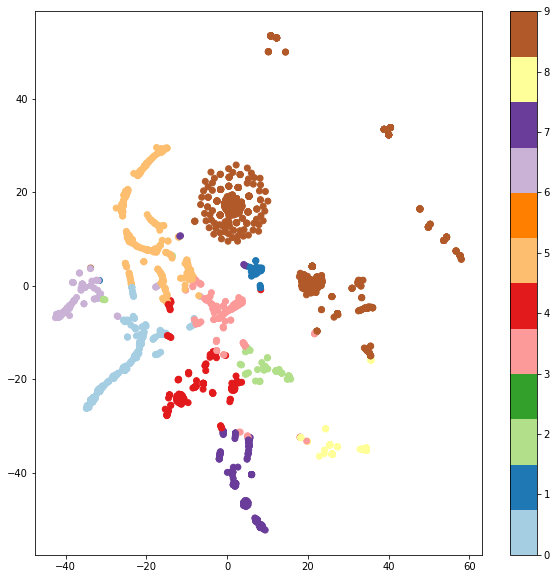

In [48]:
%%time
from sklearn.manifold  import TSNE
tsne = TSNE(n_components=2,learning_rate=50, angle=.99, init='pca')

# fit_transform
tsne_vectors_2d = tsne.fit_transform(topic_distribution[:2000])

# label
most_topic = np.zeros(2000)
for app_idx in range(2000):
    sort_indices = np.argsort(topic_distribution[app_idx])[::-1]
    most_topic[app_idx] = sort_indices[0]

# plot
plt.figure(figsize=(10,10))
plt.scatter(tsne_vectors_2d[:, 0], tsne_vectors_2d[:, 1], c=[i for i in most_topic], cmap='Paired')
plt.colorbar()